In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [9]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

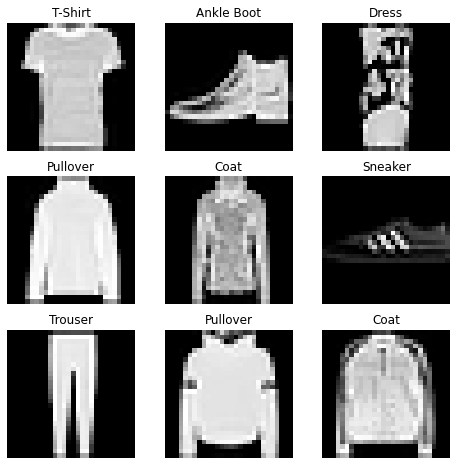

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # traning_data 중 random하게 1차원 배열로?
    img, label = training_data[sample_idx] # training_data torch에서 img, label 설정
    figure.add_subplot(rows, cols, i) # rowsXcols 의 subplot i 번째 생성
    plt.title(labels_map[label]) #  title 설정 (matplotlib)
    plt.axis("off")  #축과 라벨을 끔
    plt.imshow(img.squeeze(), cmap="gray") # 그림 표시, 차원이 1인 차원 제거, 색상 gray
plt.show() 

In [15]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset): 
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): #다음장에서 2가지 변형
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label']) # annotations_file은 이미지와 주석 파일 디렉토리
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    # index에 해당하는 샘플을 데이터셋에서 불러오고 반환
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dif, self.img_labels.iloc[idx, 0]) # 이미지 위치 식별
        image = read_image(img_path) # 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1] # self.img_labels 의 csv데이터로 정답(label) 가져오기
        if self.transform: # (해당하면) 변형 함수들을 호출, 텐서 image와 label을 dirc 형으로 반환
            image = self.transform(image) 
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
        '''
        sample = {"image": image, "label": label}
        return sample
        '''

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # 매 epochs 마다 데이터를 다시 섞어 과적합(overfit) 막음
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [18]:
print(type(train_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


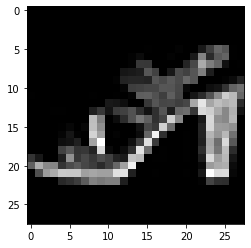

Label: 5


In [21]:
# DataLoader로 데이터셋 순회(iterate)
# iter은 반복 가능한 객체에서(list, dict, set, str, bytes, tuple, range) 값을 next 함수를 이용하여 차례대로 꺼냄, 

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") # 이미지 64장 28X28 배열 
print(f"Labels batch shape: {train_labels.size()}") # 정답(label)의 크기

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")